In [2]:
from Bio.PDB import PDBParser, Superimposer, PPBuilder
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [3]:
# Load structures
parser = PDBParser(QUIET=True)
structure1 = parser.get_structure("pred", "../pdb/test_pza/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb")
structure2 = parser.get_structure("wt", "../pdb/3PL1-PZA.pdb")

In [4]:
# Select atoms (e.g., CA atoms of the first chain)
def get_ca_atoms(structure):
    model = structure[0]  # First model
    chain = list(model.get_chains())[0]  # First chain
    return [res["CA"] for res in chain if "CA" in res][:185]

In [5]:
def get_all_atoms(structure):
    model = structure[0]  # First model
    chain = list(model.get_chains())[0]  # First chain
    atoms = []
    for residue in chain:
        if residue.id[0] == " ":  # Exclude heteroatoms and water
            for atom in residue:
                atoms.append(atom)
    return atoms[:1372]

In [6]:
atoms1 = get_ca_atoms(structure1)
atoms2 = get_ca_atoms(structure2)
# atoms1 = get_all_atoms(structure1)
# atoms2 = get_all_atoms(structure2)

In [7]:
len(atoms1), len(atoms2)

(185, 185)

In [8]:
# Superimpose and compute RMSD
sup = Superimposer()
sup.set_atoms(atoms1, atoms2)
sup.apply(structure2.get_atoms())  # Optional: apply transformation

print(f"RMSD: {sup.rms:.3f} Å")

RMSD: 0.475 Å


In [9]:
prefix = "021_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb".split('_')[0]
prefix

'021'

In [10]:
# wt = get_all_atoms(structure2)
wt = get_ca_atoms(structure2)


def get_rmsds(folder, wt_atoms):
    rmsds = {}
    files = [f for f in os.listdir(folder) if f.endswith('.pdb')]
    for file in files:
                
        atoms = get_ca_atoms(parser.get_structure("pred", f"{folder}/{file}"))
        # atoms = get_all_atoms(parser.get_structure("pred", f"{folder}/{file}"))
        
        assert len(atoms) == len(wt_atoms)
        
        sup = Superimposer()
        sup.set_atoms(atoms, wt_atoms)
        # sup.apply(structure2.get_atoms())  # Optional: apply transformation

        sample = file.split('_')[0]
        
        rmsds[sample] = sup.rms
        
        print(f"RMSD: {sup.rms:.3f} Å")
        
    return rmsds

In [11]:
get_rmsds("../pdb/test_pza", wt)

RMSD: 0.522 Å
RMSD: 0.472 Å
RMSD: 0.495 Å
RMSD: 0.559 Å
RMSD: 0.490 Å
RMSD: 0.506 Å
RMSD: 0.489 Å
RMSD: 0.489 Å
RMSD: 0.479 Å
RMSD: 0.481 Å
RMSD: 0.493 Å
RMSD: 0.486 Å
RMSD: 0.502 Å
RMSD: 0.507 Å
RMSD: 0.486 Å
RMSD: 0.520 Å
RMSD: 0.499 Å
RMSD: 0.512 Å
RMSD: 0.485 Å
RMSD: 0.486 Å
RMSD: 0.503 Å
RMSD: 0.496 Å
RMSD: 0.496 Å
RMSD: 0.492 Å
RMSD: 0.489 Å
RMSD: 0.532 Å
RMSD: 0.488 Å
RMSD: 0.459 Å
RMSD: 0.528 Å
RMSD: 0.507 Å
RMSD: 0.507 Å
RMSD: 0.513 Å
RMSD: 0.495 Å
RMSD: 0.507 Å
RMSD: 0.491 Å
RMSD: 0.504 Å
RMSD: 0.474 Å
RMSD: 0.510 Å
RMSD: 0.497 Å
RMSD: 0.506 Å
RMSD: 0.541 Å
RMSD: 0.484 Å
RMSD: 0.527 Å
RMSD: 0.475 Å
RMSD: 0.490 Å
RMSD: 0.479 Å
RMSD: 0.503 Å
RMSD: 0.479 Å
RMSD: 0.558 Å
RMSD: 0.493 Å
RMSD: 0.482 Å
RMSD: 0.492 Å
RMSD: 0.497 Å
RMSD: 0.492 Å
RMSD: 0.505 Å
RMSD: 0.501 Å
RMSD: 0.538 Å
RMSD: 0.502 Å
RMSD: 0.612 Å
RMSD: 0.489 Å
RMSD: 0.490 Å
RMSD: 0.476 Å
RMSD: 0.482 Å
RMSD: 0.780 Å
RMSD: 0.514 Å
RMSD: 0.505 Å
RMSD: 0.487 Å
RMSD: 0.506 Å
RMSD: 0.492 Å
RMSD: 0.501 Å
RMSD: 0.496 Å
RMSD: 

{'103': 0.5223493901649842,
 '91': 0.47206907336811393,
 '19': 0.4946270393743951,
 '114': 0.5589680232659214,
 '140': 0.4897547263481207,
 '181': 0.5062452504527073,
 '101': 0.488603492878531,
 '16': 0.48928742872330067,
 '102': 0.4785328955742017,
 '88': 0.480724727198626,
 '27': 0.49288980156050843,
 '129': 0.48579691832002264,
 '74': 0.5022104747788821,
 '20': 0.5066239878848462,
 '13': 0.48550073547718436,
 '121': 0.5201182863504582,
 '120': 0.49917864888754826,
 '123': 0.511552512972605,
 '67': 0.48520260870749615,
 '146': 0.48638362260740664,
 '105': 0.5031962403285846,
 '78': 0.49634274032155073,
 '98': 0.49576218800693983,
 '89': 0.49212516735689876,
 '182': 0.48882250945120204,
 '158': 0.5320335710898817,
 '133': 0.4880313320619902,
 '188': 0.4592541985638619,
 '195': 0.5278865809703095,
 '40': 0.5073566610591872,
 '142': 0.5068522761398965,
 '10': 0.5126347285539414,
 '58': 0.4953550254206005,
 '95': 0.5072814195334145,
 '198': 0.49137386803048533,
 '52': 0.5040246436477314,

In [12]:
get_rmsds("../pdb/train_pza", wt)

RMSD: 0.492 Å
RMSD: 0.537 Å
RMSD: 0.488 Å
RMSD: 0.492 Å
RMSD: 0.497 Å
RMSD: 0.474 Å
RMSD: 0.477 Å
RMSD: 0.502 Å
RMSD: 0.528 Å
RMSD: 0.540 Å
RMSD: 0.493 Å
RMSD: 0.485 Å
RMSD: 0.492 Å
RMSD: 0.498 Å
RMSD: 0.495 Å
RMSD: 0.497 Å
RMSD: 0.511 Å
RMSD: 0.487 Å
RMSD: 0.499 Å
RMSD: 0.490 Å
RMSD: 0.502 Å
RMSD: 0.515 Å
RMSD: 0.488 Å
RMSD: 0.478 Å
RMSD: 0.492 Å
RMSD: 0.501 Å
RMSD: 0.486 Å
RMSD: 0.505 Å
RMSD: 0.489 Å
RMSD: 0.481 Å
RMSD: 0.481 Å
RMSD: 0.483 Å
RMSD: 0.497 Å
RMSD: 0.479 Å
RMSD: 0.483 Å
RMSD: 0.504 Å
RMSD: 0.564 Å
RMSD: 0.487 Å
RMSD: 0.494 Å
RMSD: 0.467 Å
RMSD: 0.486 Å
RMSD: 0.505 Å
RMSD: 0.472 Å
RMSD: 0.499 Å
RMSD: 0.490 Å
RMSD: 0.492 Å
RMSD: 0.488 Å
RMSD: 0.474 Å
RMSD: 0.443 Å
RMSD: 0.485 Å
RMSD: 0.497 Å
RMSD: 0.488 Å
RMSD: 0.499 Å
RMSD: 0.498 Å
RMSD: 0.500 Å
RMSD: 0.485 Å
RMSD: 0.507 Å
RMSD: 0.490 Å
RMSD: 0.486 Å
RMSD: 0.515 Å
RMSD: 0.467 Å
RMSD: 0.513 Å
RMSD: 0.487 Å
RMSD: 0.495 Å
RMSD: 0.498 Å
RMSD: 0.481 Å
RMSD: 0.497 Å
RMSD: 0.499 Å
RMSD: 0.502 Å
RMSD: 0.498 Å
RMSD: 0.548 Å
RMSD: 

{'108': 0.49239540495368644,
 '457': 0.5366818373052946,
 '103': 0.4880104461258935,
 '428': 0.49202785264530446,
 '429': 0.4971804409924991,
 '369': 0.47439754545601565,
 '19': 0.477151769225237,
 '140': 0.5023718053014848,
 '248': 0.5282316702847792,
 '181': 0.5396154833405516,
 '101': 0.49322768083591406,
 '386': 0.485285835150305,
 '319': 0.4918898096523412,
 '443': 0.4982751161546227,
 '16': 0.49468546905108735,
 '102': 0.49663495235991767,
 '245': 0.5109099386633146,
 '417': 0.48668245841345914,
 '256': 0.49931212292035354,
 '361': 0.4896367716500875,
 '88': 0.5019468151101857,
 '322': 0.5152760930422398,
 '27': 0.48810264869429576,
 '129': 0.4780624677741786,
 '463': 0.49180434331819306,
 '20': 0.5014834465202579,
 '13': 0.48642483925968966,
 '218': 0.5049187826789344,
 '349': 0.48910561709638667,
 '330': 0.48077064206387854,
 '221': 0.48104729266431656,
 '121': 0.4834600861816255,
 '120': 0.49715511967915116,
 '389': 0.47918209930051997,
 '123': 0.4831626585701105,
 '152': 0.50

In [13]:
get_rmsds("../pdb/wt", wt)

RMSD: 0.503 Å


{'0': 0.5028097288451695}

### check wt structure is actually wt

In [14]:
import MDAnalysis

protein_structure = MDAnalysis.Universe('../pdb/wt/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb')

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
af_seq = str(protein_structure.residues.sequence().seq)

In [16]:
wt_seq = "MRALIIVDVQNDFCEGGSLAVTGGAALARAISDYLAEAADYHHVVATKDFHIDPGDHFSGTPDYSSSWPPHCVSGTPGADFHPSLDTSAIEAVFYKGAYTGAYSGFEGVDENGTPLLNWLRQRGVDEVDVVGIATDHCVRQTAEDAVRNGLATRVLVDLTAGVSADTTVAALEEMRTASVELVCSS"

In [17]:
wt_seq == af_seq

True

In [18]:
# test on mutated sequence

protein_structure = MDAnalysis.Universe('../pdb/test_pza/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb')
af_seq = str(protein_structure.residues[:186].sequence().seq)
af_seq

/home/ubuntu/.local/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/ubuntu/.local/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


'MRALIIVDVQNDFCEGGSLAVTGGAALARAISDYLAEAADYHHVVATKDFHIDPGDHFSGTPDYSSSWPPHCVSGTPGADFHPSLDTSAIEAVFYKGAYTGAYSGFEGVDENGTPLLNWLRQRGVDEVDVVGIATDHCVRQTDEDAVRNGLATRVLVDLTAGVSADTTVAALEEMRTASVELVCSS'

In [19]:
wt_seq == af_seq

False

### repeat RMSD with AF wt

In [20]:
af_wt_struct = parser.get_structure("wt", '../pdb/wt/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb')
af_wt_atoms = get_ca_atoms(af_wt_struct)
print(len(af_wt_atoms))

185


In [21]:
test_rmsds = get_rmsds("../pdb/test_pza", af_wt_atoms)

RMSD: 0.118 Å
RMSD: 0.095 Å
RMSD: 0.039 Å
RMSD: 0.330 Å
RMSD: 0.031 Å
RMSD: 0.040 Å
RMSD: 0.054 Å
RMSD: 0.090 Å
RMSD: 0.093 Å
RMSD: 0.075 Å
RMSD: 0.068 Å
RMSD: 0.054 Å
RMSD: 0.075 Å
RMSD: 0.148 Å
RMSD: 0.100 Å
RMSD: 0.316 Å
RMSD: 0.092 Å
RMSD: 0.100 Å
RMSD: 0.059 Å
RMSD: 0.068 Å
RMSD: 0.153 Å
RMSD: 0.079 Å
RMSD: 0.120 Å
RMSD: 0.054 Å
RMSD: 0.133 Å
RMSD: 0.226 Å
RMSD: 0.067 Å
RMSD: 0.152 Å
RMSD: 0.334 Å
RMSD: 0.112 Å
RMSD: 0.077 Å
RMSD: 0.247 Å
RMSD: 0.144 Å
RMSD: 0.056 Å
RMSD: 0.048 Å
RMSD: 0.044 Å
RMSD: 0.159 Å
RMSD: 0.121 Å
RMSD: 0.041 Å
RMSD: 0.082 Å
RMSD: 0.207 Å
RMSD: 0.125 Å
RMSD: 0.204 Å
RMSD: 0.131 Å
RMSD: 0.056 Å
RMSD: 0.070 Å
RMSD: 0.045 Å
RMSD: 0.063 Å
RMSD: 0.355 Å
RMSD: 0.064 Å
RMSD: 0.059 Å
RMSD: 0.082 Å
RMSD: 0.153 Å
RMSD: 0.064 Å
RMSD: 0.113 Å
RMSD: 0.057 Å
RMSD: 0.162 Å
RMSD: 0.051 Å
RMSD: 0.250 Å
RMSD: 0.067 Å
RMSD: 0.048 Å
RMSD: 0.078 Å
RMSD: 0.091 Å
RMSD: 0.485 Å
RMSD: 0.133 Å
RMSD: 0.069 Å
RMSD: 0.091 Å
RMSD: 0.055 Å
RMSD: 0.054 Å
RMSD: 0.043 Å
RMSD: 0.235 Å
RMSD: 

In [22]:
train_rmsds = get_rmsds("../pdb/train_pza", af_wt_atoms)

RMSD: 0.069 Å
RMSD: 0.327 Å
RMSD: 0.045 Å
RMSD: 0.043 Å
RMSD: 0.124 Å
RMSD: 0.065 Å
RMSD: 0.172 Å
RMSD: 0.087 Å
RMSD: 0.138 Å
RMSD: 0.223 Å
RMSD: 0.060 Å
RMSD: 0.055 Å
RMSD: 0.085 Å
RMSD: 0.057 Å
RMSD: 0.055 Å
RMSD: 0.061 Å
RMSD: 0.086 Å
RMSD: 0.172 Å
RMSD: 0.071 Å
RMSD: 0.085 Å
RMSD: 0.049 Å
RMSD: 0.203 Å
RMSD: 0.056 Å
RMSD: 0.073 Å
RMSD: 0.044 Å
RMSD: 0.100 Å
RMSD: 0.048 Å
RMSD: 0.040 Å
RMSD: 0.157 Å
RMSD: 0.064 Å
RMSD: 0.062 Å
RMSD: 0.067 Å
RMSD: 0.037 Å
RMSD: 0.071 Å
RMSD: 0.071 Å
RMSD: 0.055 Å
RMSD: 0.243 Å
RMSD: 0.069 Å
RMSD: 0.134 Å
RMSD: 0.200 Å
RMSD: 0.089 Å
RMSD: 0.048 Å
RMSD: 0.182 Å
RMSD: 0.055 Å
RMSD: 0.053 Å
RMSD: 0.069 Å
RMSD: 0.046 Å
RMSD: 0.072 Å
RMSD: 0.204 Å
RMSD: 0.121 Å
RMSD: 0.051 Å
RMSD: 0.096 Å
RMSD: 0.068 Å
RMSD: 0.059 Å
RMSD: 0.112 Å
RMSD: 0.152 Å
RMSD: 0.074 Å
RMSD: 0.059 Å
RMSD: 0.067 Å
RMSD: 0.073 Å
RMSD: 0.149 Å
RMSD: 0.135 Å
RMSD: 0.043 Å
RMSD: 0.053 Å
RMSD: 0.047 Å
RMSD: 0.100 Å
RMSD: 0.071 Å
RMSD: 0.077 Å
RMSD: 0.052 Å
RMSD: 0.045 Å
RMSD: 0.220 Å
RMSD: 

### Analyse RMSDs

In [23]:
test_df = pd.DataFrame(test_rmsds.items(), columns=['Sample', 'RMSD']).set_index('Sample')
test_df.index = test_df.index.astype(int)
test_df.sort_index(inplace=True)

train_df = pd.DataFrame(train_rmsds.items(), columns=['Sample', 'RMSD']).set_index('Sample')
train_df.index = train_df.index.astype(int)
train_df.sort_index(inplace=True)

In [24]:
train_df.describe()

,RMSD
count,464.000000
mean,0.105008
std,0.068884
min,0.035670
25%,0.059812
50%,0.082174
75%,0.126391
max,0.465885


In [25]:
test_df.describe()

,RMSD
count,200.000000
mean,0.110784
std,0.085925
min,0.030654
25%,0.059968
50%,0.079540
75%,0.127130
max,0.539620


In [26]:
full_df = pd.concat([train_df, test_df]).reset_index(drop=True)
full_df.describe()

,RMSD
count,664.000000
mean,0.106748
std,0.074409
min,0.030654
25%,0.059818
50%,0.080798
75%,0.126709
max,0.539620


### Get phenotypes

In [27]:
train_seqs = pd.read_csv('../data/real_train_sequences.csv')
test_seqs = pd.read_csv('../data/real_test_sequences.csv')

In [28]:
train_seqs.phenotype_label

0      S
1      S
2      R
3      S
4      R
      ..
459    S
460    S
461    S
462    S
463    S
Name: phenotype_label, Length: 464, dtype: object

In [29]:
train_df = pd.merge(train_df, train_seqs['phenotype_label'], left_index=True, right_index=True)
test_df = pd.merge(test_df, test_seqs['phenotype_label'], left_index=True, right_index=True)

In [30]:
display(train_df[train_df['phenotype_label'] == 'R'].describe())
display(train_df[train_df['phenotype_label'] == 'S'].describe())

,RMSD
count,246.000000
mean,0.119247
std,0.068614
min,0.038990
25%,0.065983
50%,0.101779
75%,0.148868
max,0.465885


,RMSD
count,218.000000
mean,0.088939
std,0.065724
min,0.035670
25%,0.053650
50%,0.068236
75%,0.094058
max,0.398973


In [31]:
display(test_df[test_df['phenotype_label'] == 'R'].describe())
display(test_df[test_df['phenotype_label'] == 'S'].describe())

,RMSD
count,103.000000
mean,0.127118
std,0.092595
min,0.041159
25%,0.066364
50%,0.094677
75%,0.152333
max,0.539620


,RMSD
count,97.000000
mean,0.093439
std,0.074864
min,0.030654
25%,0.056384
50%,0.067617
75%,0.091190
max,0.397053


### Boxplot of RMSDs

Show full dataset
Train
Test
All susceptible
All resistant

In [32]:
# Example data
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'Group': np.random.choice(['A', 'B', 'C', 'D', 'E'], size=n),
    'Age': np.random.randint(18, 90, size=n),
    'Category': np.random.choice(['X', 'Y'], size=n)  # Variable for color
})

df

,Group,Age,Category
0,D,45,X
1,E,24,Y
2,C,89,X
3,E,29,X
4,E,51,X
...,...,...,...
95,C,87,Y
96,E,20,X
97,B,37,X
98,B,76,X


In [36]:
train_df['Dataset'] = 'Train'
test_df['Dataset'] = 'Test'

In [37]:
full_set_df = pd.concat([train_df, test_df]).reset_index(drop=True)
full_set_df

,RMSD,phenotype_label,Dataset
0,0.132045,S,Train
1,0.090405,S,Train
2,0.093664,R,Train
3,0.077379,S,Train
4,0.253758,R,Train
...,...,...,...
659,0.334187,R,Test
660,0.082294,S,Test
661,0.067970,S,Test
662,0.047777,S,Test


In [38]:
# pd.concat([full_set_df, full_set_df])

/tmp/ipykernel_2257422/2319835050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_set_df, x='phenotype_label', y='RMSD', palette=palette, showmeans=True,


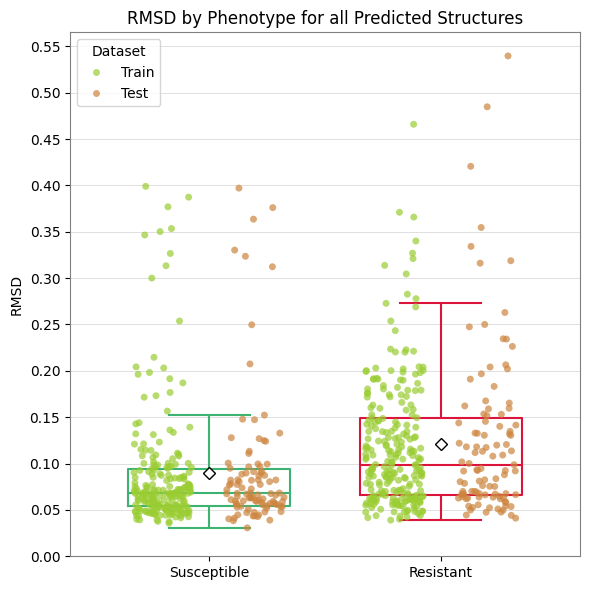

In [146]:
plt.figure(figsize=(6, 6))

palette = {'S': 'mediumseagreen', 'R': 'crimson'}
dot_palette = {'Train': 'yellowgreen', 'Test': 'peru'}


sns.boxplot(data=full_set_df, x='phenotype_label', y='RMSD', palette=palette, showmeans=True,
            width=0.7,
            fill=False,
            meanprops={'marker':'D', 'markerfacecolor':'white',
                       'markeredgecolor':'black', 'linestyle':'--'},
            showfliers=False,
        #     boxprops={'edgecolor': 'white'},
            # medianprops={
                # 'color': 'whitesmoke', 
                # 'linewidth': 1.5
                # },
        #     whiskerprops={'color': 'gray'},
            )


# Add jittered dots, colored by 'Category'
sns.stripplot(data=full_set_df, x='phenotype_label', y='RMSD', hue='Dataset', palette=dot_palette,
              dodge=True, jitter=0.25, alpha=0.7, size=5)

plt.yticks(np.arange(0, 0.6, 0.05))
plt.xticks(ticks=[0, 1], labels=['Susceptible', 'Resistant'])

plt.xlim(-0.6, 1.6)

# Change figure outline color
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Add gridlines
plt.grid(color='lightgray', 
        #  linestyle='--', 
         linewidth=0.5, 
         axis='y'
         )


# Clean up legend
plt.legend(title='Dataset',
        #    bbox_to_anchor=(1, 1), 
        #    loc='upper right'
           )
plt.title('RMSD by Phenotype for all Predicted Structures')

plt.xlabel('')
plt.ylabel('RMSD')

plt.tight_layout()
plt.show()
